In [1]:
import numpy as np
import pandas as pd

import sys
sys.path.insert(0, '..')

from match.make_match_panel import make_match_panel
from match.make_summary_match_panel import make_summary_match_panel
from match.support.support.df import simulate_df
from match.support.support.series import simulate_series

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
n_rows = 100
n_columns = 100

In [3]:
target = simulate_series(n_columns, name='Target Name', index_prefix='Sample ')

In [4]:
features_continuous = simulate_df(
    n_rows, n_columns, index_prefix='Feature ', column_prefix='Sample ')

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x7f0618173268> (2 process) ...
Computing MoEs with 5 samplings ...
Computing p-values and FDRs with 5 permutations ...
Computing p-values and FDRs with 5 permutations ...
	1/5 ...
	1/5 ...
	5/5 - done.
	5/5 - done.


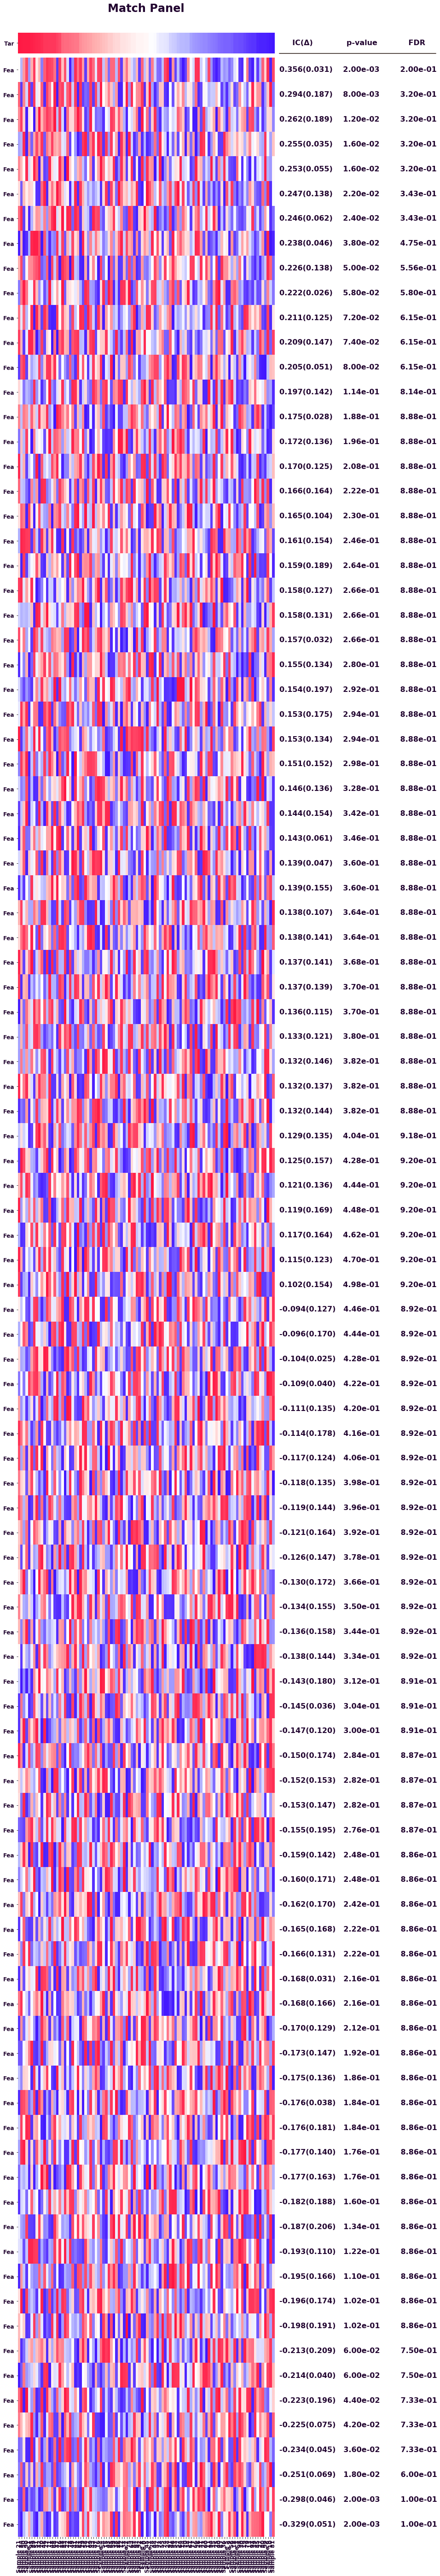

In [5]:
match_scores_for_continuous = make_match_panel(
    target,
    features_continuous,
    n_job=2,
    n_top_features=50,
    n_sampling=5,
    n_permutation=5,
    max_ytick_size=3,
    plot_column_names=True)

In [6]:
target_str = pd.Series(
    ['T0'] * (n_columns // 2) + ['T1'] * (n_columns // 2), index=target.index)

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x7f0618173268> (2 process) ...
Computing MoEs with 3 samplings ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
	3/3 - done.
	3/3 - done.


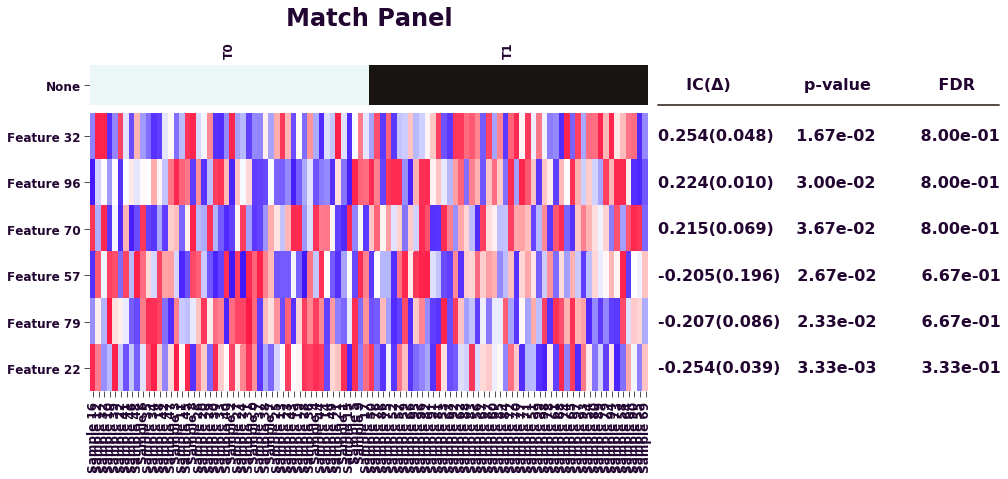

In [7]:
match_scores_for_continuous = make_match_panel(
    target_str,
    features_continuous,
    n_job=2,
    n_top_features=3,
    n_sampling=3,
    n_permutation=3,
    target_type='binary',
    plot_column_names=True)

In [8]:
features_categorical = simulate_df(
    n_rows, n_columns, 8, index_prefix='Feature ', column_prefix='Sample ')

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x7f0618173268> (2 process) ...
Computing MoEs with 3 samplings ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
	3/3 - done.
	3/3 - done.


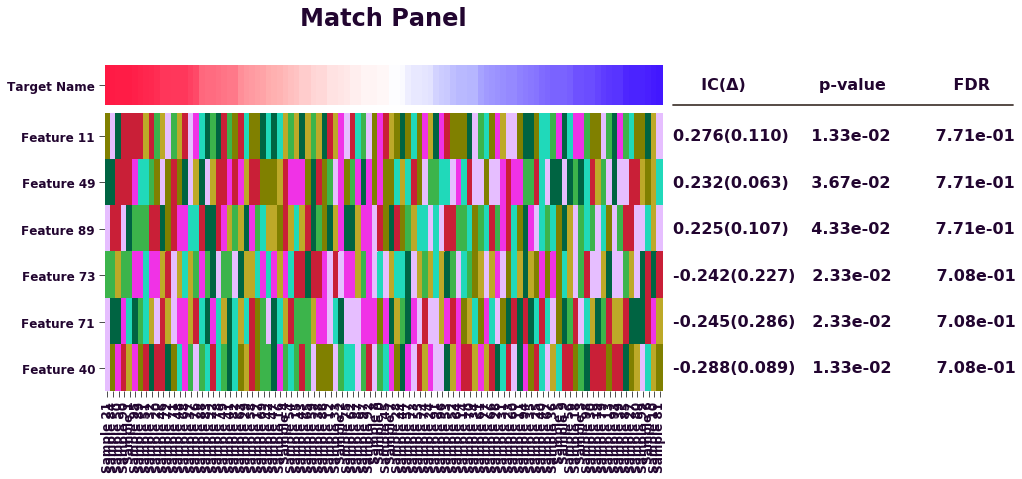

In [9]:
match_scores_for_categorical = make_match_panel(
    target,
    features_categorical,
    n_job=2,
    n_top_features=3,
    n_sampling=3,
    n_permutation=3,
    features_type='categorical',
    plot_column_names=True)

In [10]:
features_binary = simulate_df(
    n_rows, n_columns, 2, index_prefix='Feature ', column_prefix='Sample ')

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x7f0618173268> (2 process) ...
Computing MoEs with 3 samplings ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
	3/3 - done.
	3/3 - done.


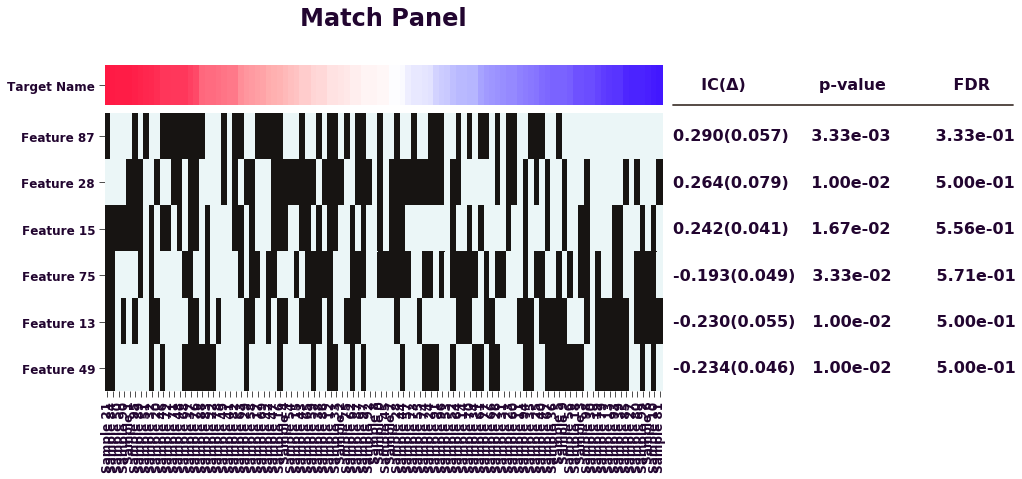

In [11]:
match_scores_for_binary = make_match_panel(
    target,
    features_binary,
    n_job=2,
    n_top_features=3,
    n_sampling=3,
    n_permutation=3,
    features_type='binary',
    plot_column_names=True)

In [12]:
features_with_missing = simulate_df(
    n_rows, n_columns, index_prefix='Feature ', column_prefix='Sample ')

features_with_missing.loc[
    np.random.choice(features_with_missing.index, size=n_columns // 3),
    np.random.choice(features_with_missing.columns, size=n_columns //
                     3)] = None

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x7f0618173268> (2 process) ...
Computing MoEs with 3 samplings ...
Computing p-values and FDRs with 3 permutations ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
	1/3 ...
	3/3 - done.
	3/3 - done.


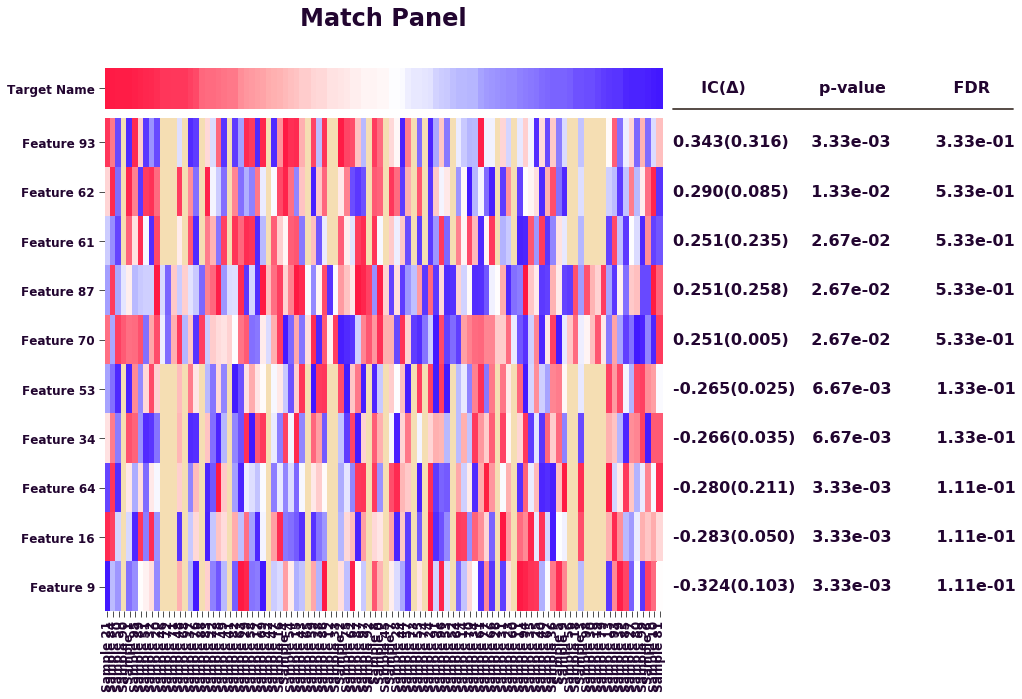

In [13]:
match_scores_for_binary = make_match_panel(
    target,
    features_with_missing,
    n_job=2,
    n_top_features=0.95,
    n_sampling=3,
    n_permutation=3,
    features_type='continuous',
    plot_column_names=True)

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x7f0618173268> (2 process) ...
Computing MoEs with 3 samplings ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
	3/3 - done.
	3/3 - done.


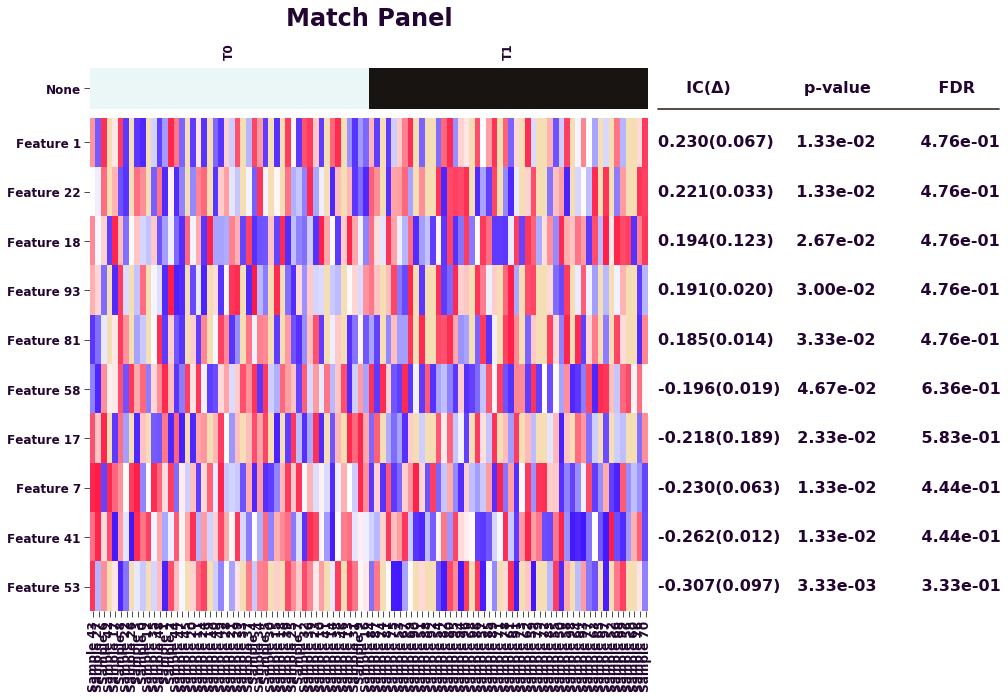

In [14]:
match_scores_for_binary = make_match_panel(
    target_str,
    features_with_missing,
    n_job=2,
    n_top_features=0.95,
    n_sampling=3,
    n_permutation=3,
    features_type='continuous',
    target_type='binary',
    plot_column_names=True)

In [15]:
n = 3
multiple_features = {
    'Continuous features': {
        'df': features_continuous.iloc[:n, :],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'high',
        'data_type': 'continuous'
    },
    'Categorical features': {
        'df': features_categorical.iloc[:n, :],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'high',
        'data_type': 'categorical'
    },
    'Binary features': {
        'df': features_binary.iloc[:n, :],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'high',
        'data_type': 'binary'
    },
    'Cotinuous features (scores ascending)': {
        'df': features_continuous.iloc[:n, :-3],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'low',
        'data_type': 'continuous'
    }
}

Making match panel for Continuous features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x7f0618173268> (1 process) ...
Computing MoEs with 3 samplings ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
	3/3 - done.
Making match panel for Categorical features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x7f0618173268> (1 process) ...
Computing MoEs with 3 samplings ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
	3/3 - done.
Making match panel for Binary features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x7f0618173268> (1 process) ...
Computing MoEs with 3 samplings ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
	3/3 - done.
Making match panel for Cotinuous features (scores ascending) ...
Dropping 0 axis-1 slices ...
Computing match score with <function co

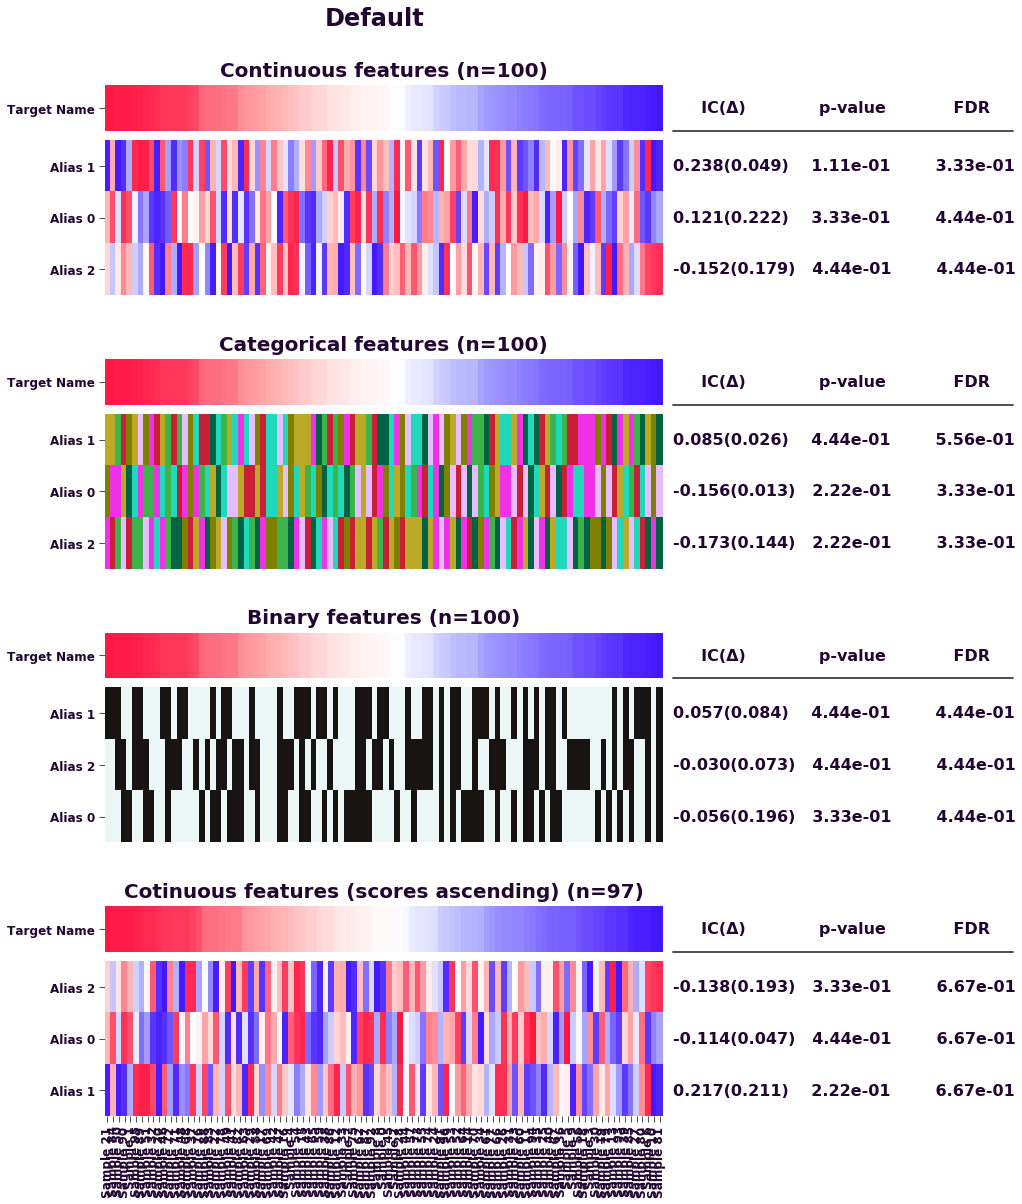

In [16]:
make_summary_match_panel(
    target, multiple_features, title='Default', plot_column_names=True)

Making match panel for Continuous features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x7f0618173268> (1 process) ...
Computing MoEs with 3 samplings ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
	3/3 - done.
Making match panel for Categorical features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x7f0618173268> (1 process) ...
Computing MoEs with 3 samplings ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
	3/3 - done.
Making match panel for Binary features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x7f0618173268> (1 process) ...
Computing MoEs with 3 samplings ...
Computing p-values and FDRs with 3 permutations ...
	1/3 ...
	3/3 - done.
Making match panel for Cotinuous features (scores ascending) ...
Dropping 0 axis-1 slices ...
Computing match score with <function co

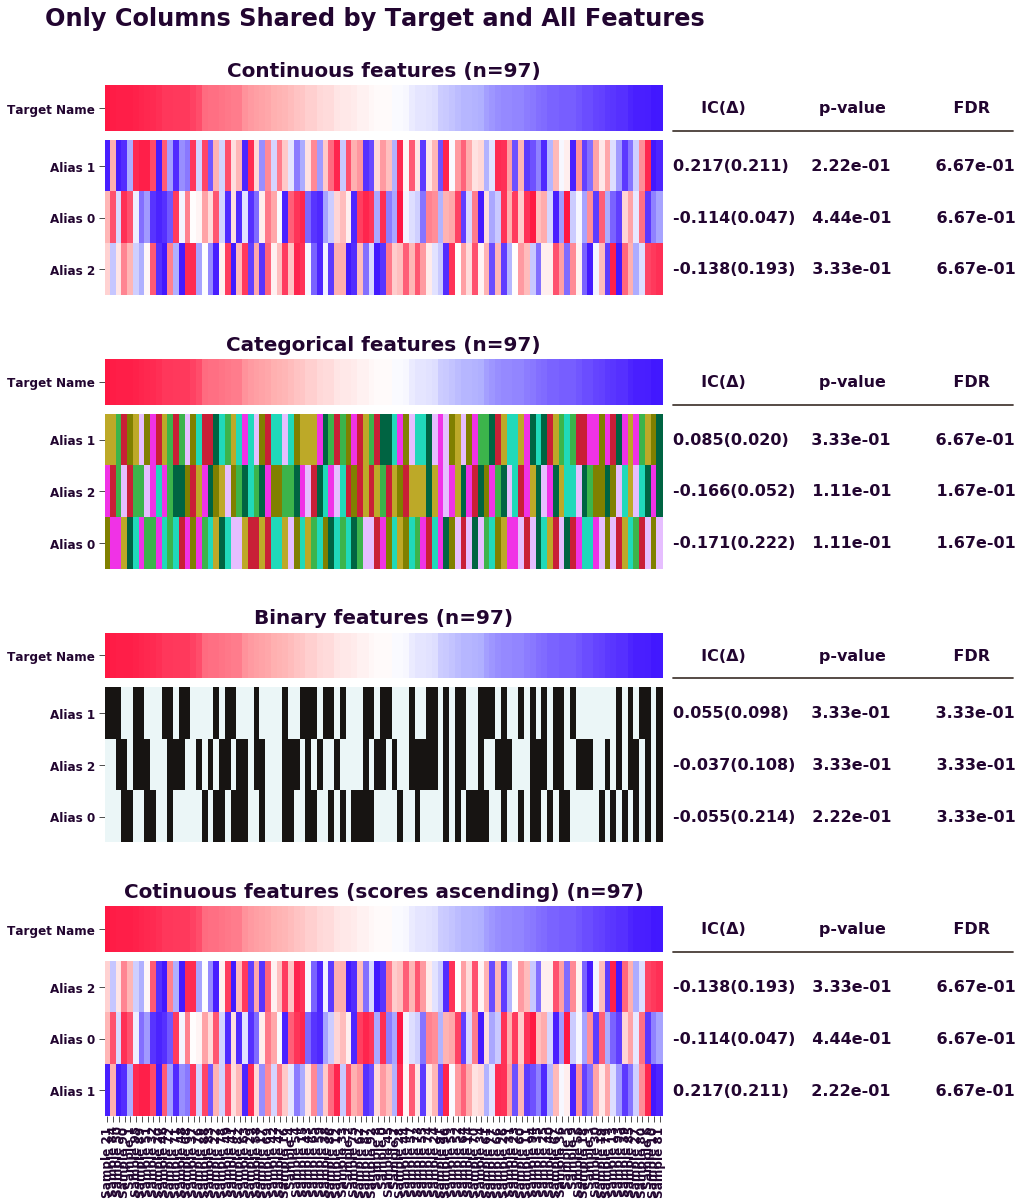

In [17]:
make_summary_match_panel(
    target,
    multiple_features,
    plot_only_columns_shared_by_target_and_all_features=True,
    title='Only Columns Shared by Target and All Features',
    plot_column_names=True)

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x7f0618173268> (1 process) ...
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
Computing MoEs with 3 samplings ...
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
There is less than 3 samples after dropping nans.
Computing p-values and FDRs wit

../match/nd_array/nd_array/compute_empirical_p_value.py:13: RuntimeWarning: invalid value encountered in less_equal
  significant_random_values = random_values <= value
../match/nd_array/nd_array/compute_empirical_p_value.py:16: RuntimeWarning: invalid value encountered in greater_equal
  significant_random_values = value <= random_values


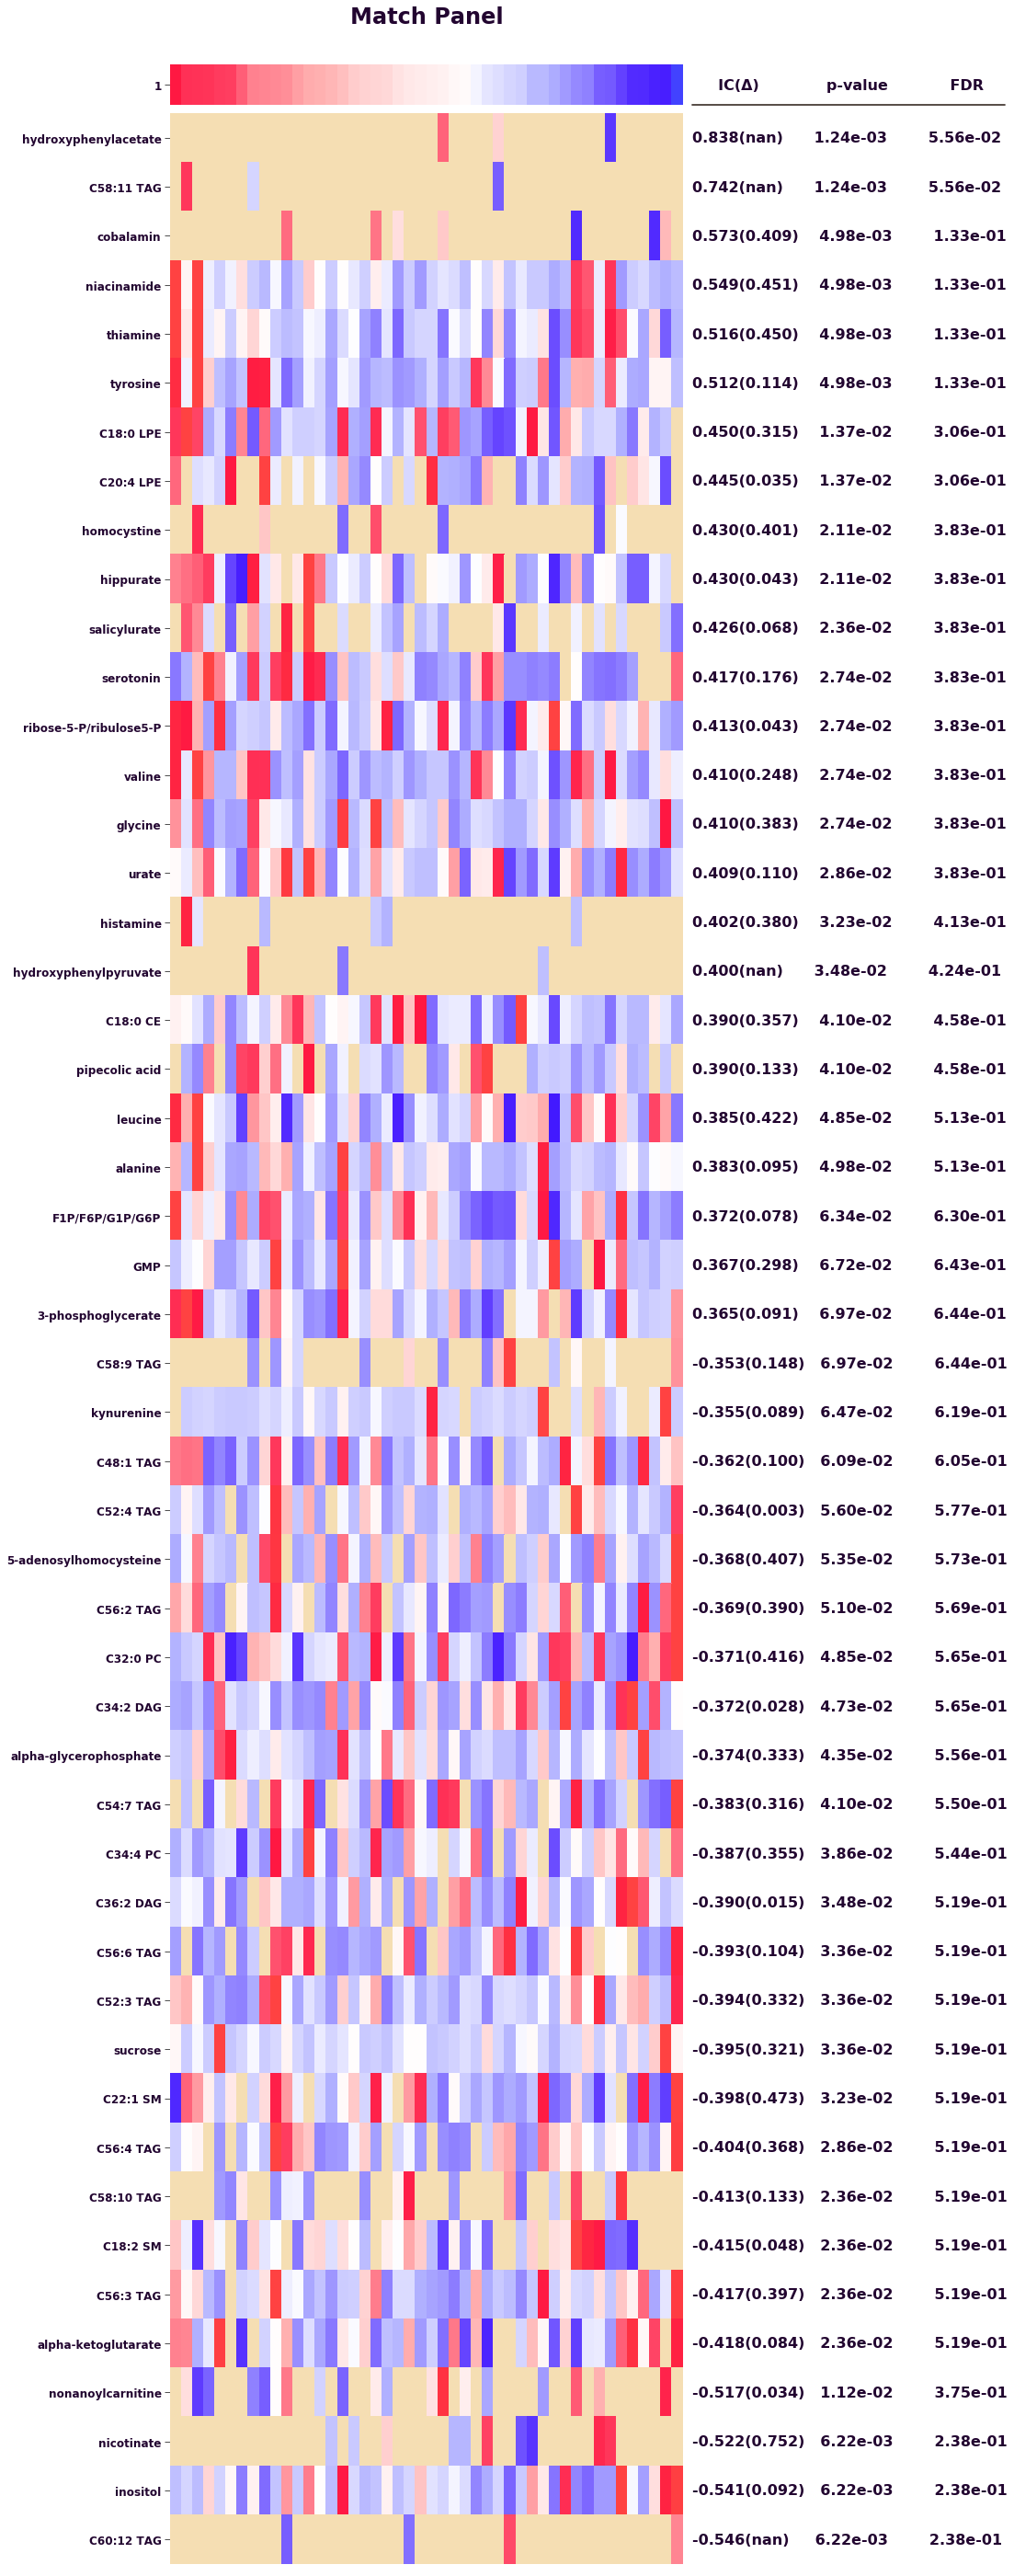

,Score,0.95 MoE,p-value,FDR
Name,,,,
hydroxyphenylacetate,0.838490,NaN,0.001244,0.055556
C58:11 TAG,0.741950,NaN,0.001244,0.055556
cobalamin,0.572858,0.408617,0.004975,0.133333
niacinamide,0.548765,0.451332,0.004975,0.133333
thiamine,0.515596,0.449692,0.004975,0.133333
tyrosine,0.511692,0.114007,0.004975,0.133333
C18:0 LPE,0.450106,0.314868,0.013682,0.305556
C20:4 LPE,0.444891,0.0352014,0.013682,0.305556
homocystine,0.430386,0.401345,0.021144,0.383333


In [18]:
target = pd.read_table('target.tsv', index_col=0, header=None, squeeze=True)
features = pd.read_table('features.tsv', index_col=0)

make_match_panel(target, features)